## Helper functions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_product_mid_prices(csv_file_path: str, ignore_old: bool = True):
    try:
        df = pd.read_csv(csv_file_path, delimiter=';')

        # Convert relevant cols to numeric
        df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
        df['mid_price'] = pd.to_numeric(df['mid_price'], errors='coerce')

        # Drop rows where data is missing after conversion, if any
        df.dropna(subset=['timestamp', 'mid_price', 'product'], inplace=True)

        # Get all unique product
        all_products = df['product'].unique()

        # Products to ignore
        products_to_ignore = {'KELP', 'RAINFOREST_RESIN', 
                              'SQUID_INK', 'VOLCANIC_ROCK',
                              'VOLCANIC_ROCK_VOUCHER_9500',
                              'VOLCANIC_ROCK_VOUCHER_9750',
                              'VOLCANIC_ROCK_VOUCHER_10000',
                              'VOLCANIC_ROCK_VOUCHER_10250',
                              'VOLCANIC_ROCK_VOUCHER_10500',
                              'DJEMBES', 'PICNIC_BASKET1',
                              'PICNIC_BASKET2', 'CROISSANTS',
                              'JAMS'} 

        # Filter the product list based on the ignore_old flag
        if ignore_old:
            products_to_plot = [p for p in all_products if p not in products_to_ignore]
        else:
            products_to_plot = list(all_products) # Plot all products

        num_products_to_plot = len(products_to_plot)

        # Check if there are any products left to plot
        if num_products_to_plot == 0:
            print("No products to plot")
            return

        # Create the figure and the exact number of subplots required
        fig, axes = plt.subplots(nrows=num_products_to_plot, ncols=1, sharex=True,
                                 figsize=(12, 4 * num_products_to_plot), squeeze=False)
        axes = axes.flatten()

        # Iterate through products 
        for i, product in enumerate(products_to_plot):
            ax = axes[i] # Select the correct subplot axis

            # Filter the DataFrame for the current product's data
            product_df = df[df['product'] == product].sort_values('timestamp')

            # Plot mid_price vs timestamp for this product
            ax.plot(product_df['timestamp'], product_df['mid_price'], label=product)

            # Set the title and y-axis label for this subplot
            ax.set_title(f'{product} Mid Price')
            ax.set_ylabel('Mid Price')
            ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
            ax.grid(True, linestyle='--', alpha=0.6)
            
             
        # Set the x-axis label only on the bottom-most subplot
        axes[-1].set_xlabel('Timestamp')
        plt.tight_layout() 
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{csv_file_path}' was not found.")

def plot_macaron_observations(df: pd.DataFrame, third_plot_object: str):
    df["midPrice"] = (df["bidPrice"] + df["askPrice"]) / 2

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Macaron midPrice on ax1
    ax1.set_xlabel("Timestamp")
    ax1.set_ylabel("Macaron Mid-Price", color="tab:blue")
    ax1.plot(df["timestamp"], df["midPrice"], label="Mid-Price", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Plot sugarPrice on ax2
    ax2 = ax1.twinx()
    ax2.set_ylabel("Sugar Price", color="tab:red")
    ax2.plot(df["timestamp"], df["sugarPrice"], label="Sugar Price", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # Plot third object on ax3
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("axes", 1.1))  # Move third axis to the right
    ax3.set_ylabel(third_plot_object, color="tab:green")
    ax3.plot(df["timestamp"], df[third_plot_object], label=third_plot_object, color="tab:green")
    ax3.tick_params(axis="y", labelcolor="tab:green")

    # Title & grid
    plt.title(f"Macaron Mid-Price, Sugar Price & {third_plot_object} Over Time")
    ax1.grid(True)
    plt.tight_layout()
    plt.show()

## Round 5 products and Data plotting

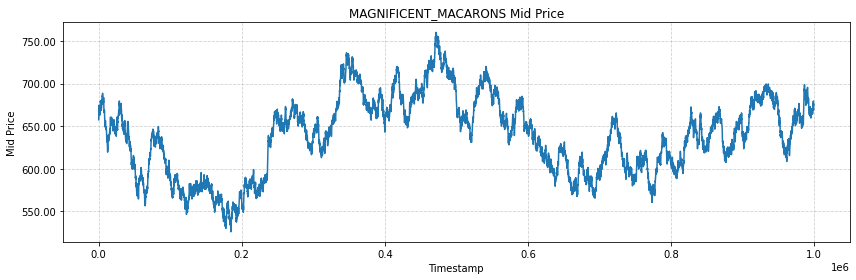

In [2]:
plot_product_mid_prices('data/2025/round5/prices_round_5_day_2.csv', ignore_old=True)


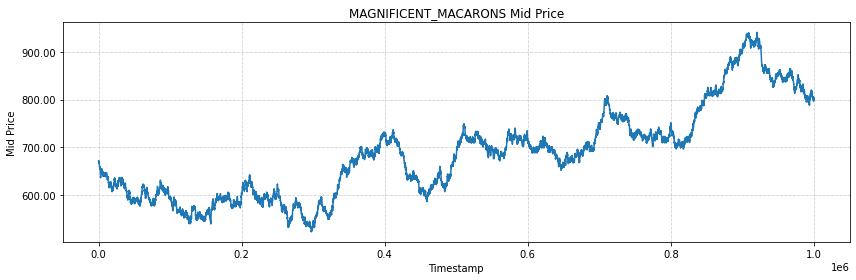

In [3]:
plot_product_mid_prices('data/2025/round5/prices_round_5_day_3.csv', ignore_old=True)

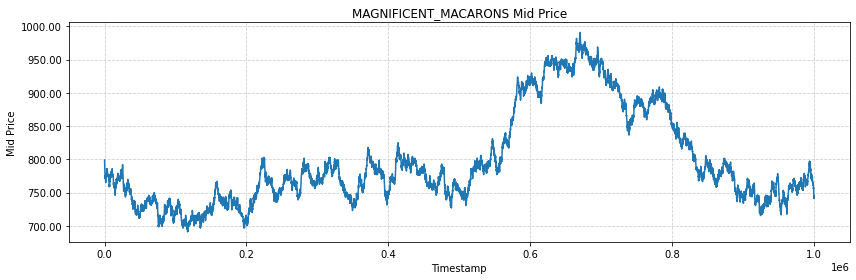

In [4]:
plot_product_mid_prices('data/2025/round5/prices_round_5_day_4.csv', ignore_old=True)

## Observations plotting

In [5]:
df1 = pd.read_csv('data/2025/round5/observations_round_5_day_2.csv', delimiter=',')
df2 = pd.read_csv('data/2025/round5/observations_round_5_day_3.csv', delimiter=',')
df3 = pd.read_csv('data/2025/round5/observations_round_5_day_4.csv', delimiter=',')

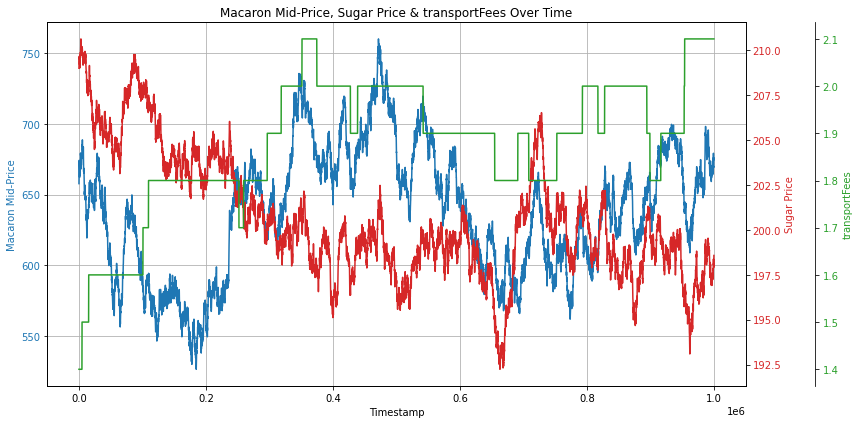

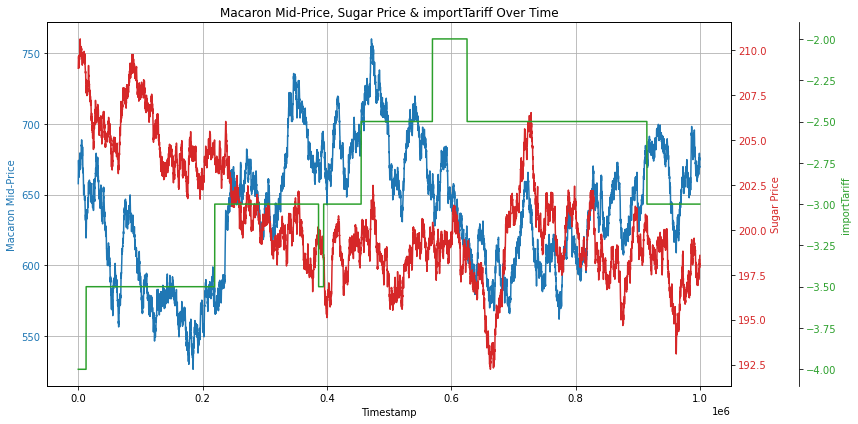

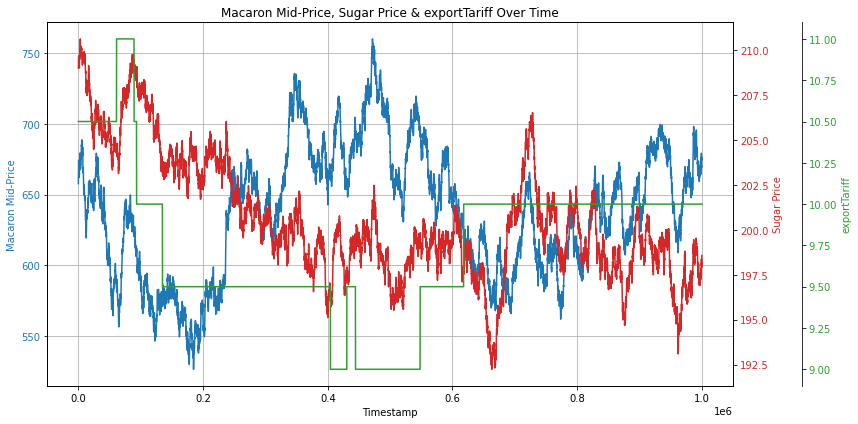

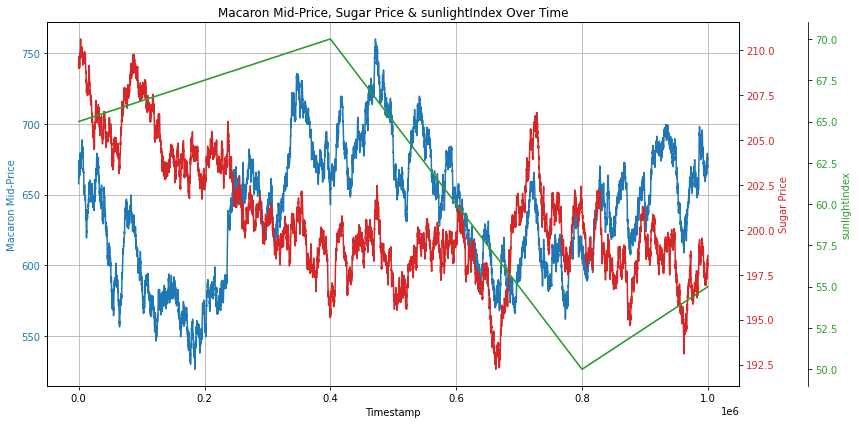

In [6]:
plot_macaron_observations(df1, 'transportFees')
plot_macaron_observations(df1, 'importTariff')
plot_macaron_observations(df1, 'exportTariff')
plot_macaron_observations(df1, 'sunlightIndex')


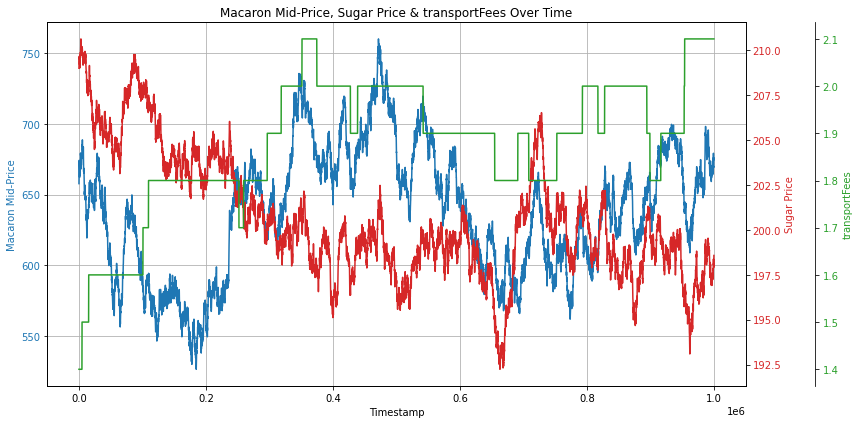

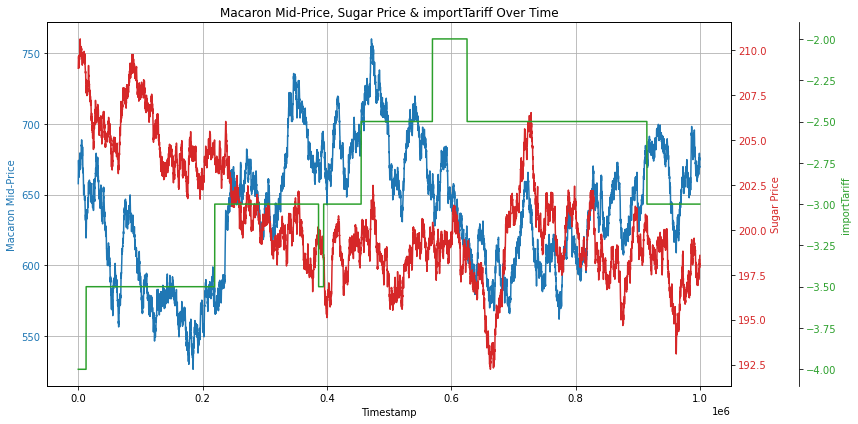

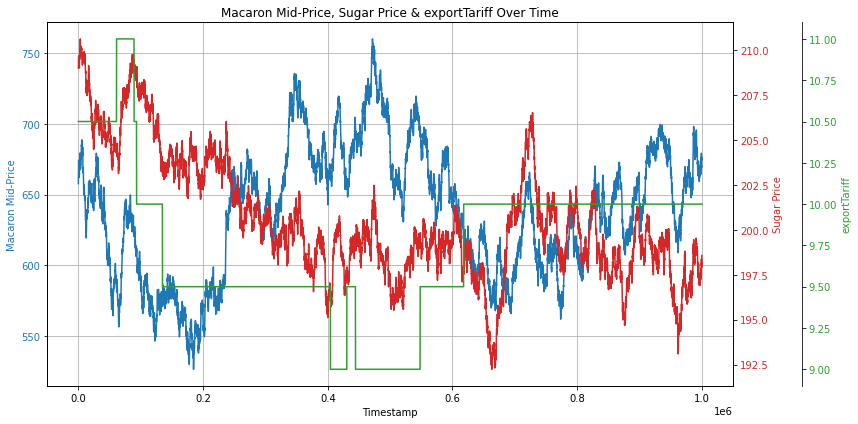

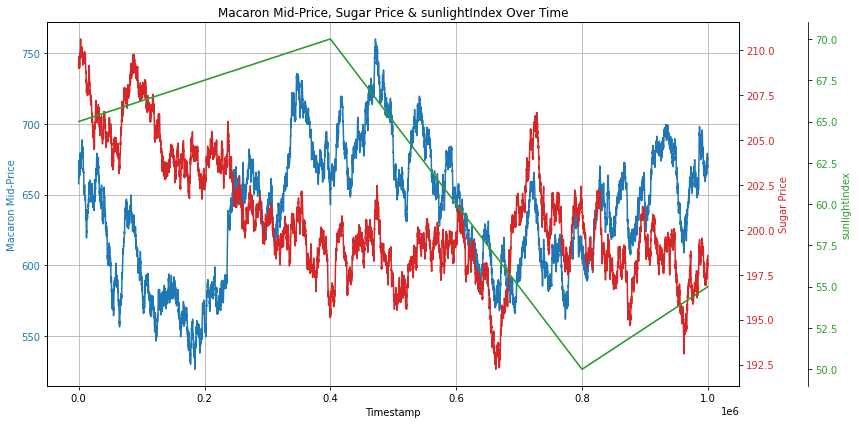

In [7]:
plot_macaron_observations(df2, 'transportFees')
plot_macaron_observations(df2, 'importTariff')
plot_macaron_observations(df2, 'exportTariff')
plot_macaron_observations(df2, 'sunlightIndex')

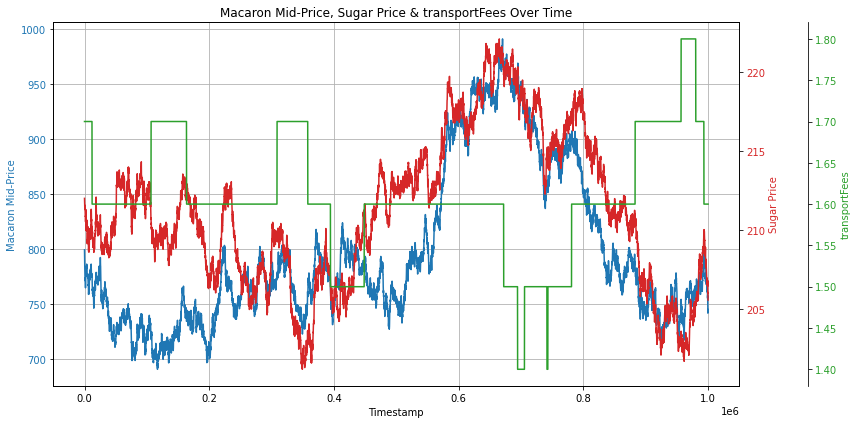

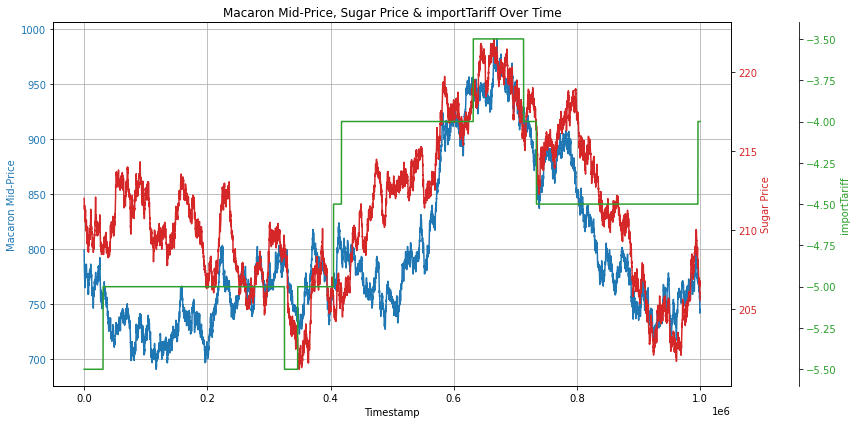

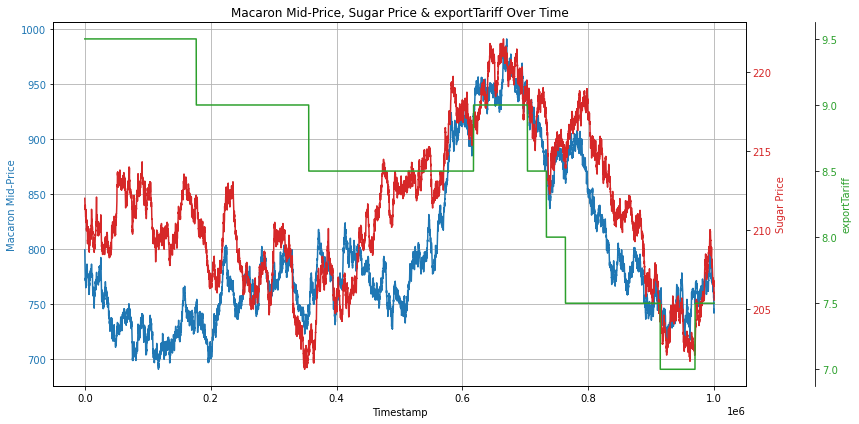

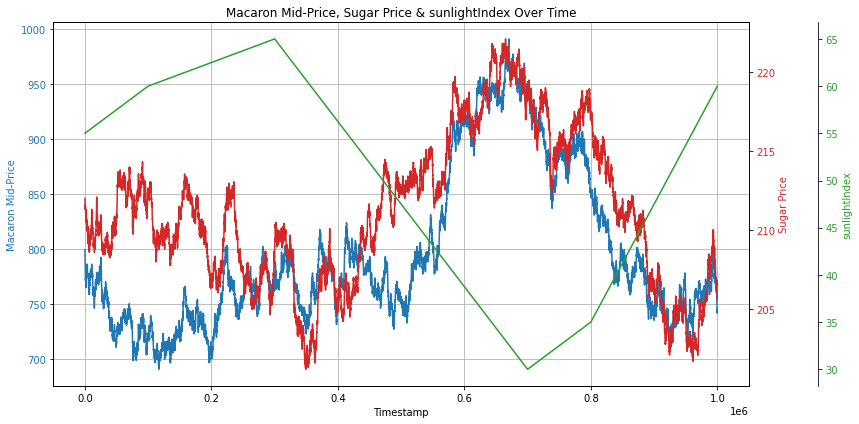

In [7]:
plot_macaron_observations(df3, 'transportFees')
plot_macaron_observations(df3, 'importTariff')
plot_macaron_observations(df3, 'exportTariff')
plot_macaron_observations(df3, 'sunlightIndex')

## Hint Round 4

It was well understood lore in Archipelago that low sunlight index can impact sugar and MACARON production negatively causing prices to rise due to panic among residents. However, ArchiResearchers have identified existence of a CriticalSunlightIndex (CSI).  

If sunlightIndex goes below this CSI with an anticipation to remain under this critical level for a long period of time, sugar and MACARON prices can increase by substantial amount with a strong correlation.  

When sunlightIndex is above this CSI, Sugar and MACARON prices tend to trade around their respective fair values and demonstrates market supply-demand dynamics.  
 
Can you find this CSI and use it to trade better than ever and make your island prosper? All the best!  

In [8]:
# Load the data
df1 = pd.read_csv('data/2025/round5/observations_round_5_day_2.csv', delimiter=',')
df2 = pd.read_csv('data/2025/round5/observations_round_5_day_3.csv', delimiter=',')
df3 = pd.read_csv('data/2025/round5/observations_round_5_day_4.csv', delimiter=',')

# Define the time offset (assuming each day has 10000 steps of 100ms = 1,000,000 microseconds total)
TIME_OFFSET = 1_000_000

# Offset the timestamps
df2['timestamp'] += TIME_OFFSET  # day 2 starts after day 1
df3['timestamp'] += 2 * TIME_OFFSET  # day 3 starts after day 2

# Concatenate all three
df_all = pd.concat([df1, df2, df3], ignore_index=True)

# Sort just in case
df_all = df_all.sort_values("timestamp").reset_index(drop=True)

# Check result
print(df_all['timestamp'].min(), "→", df_all['timestamp'].max())

0 → 2999900


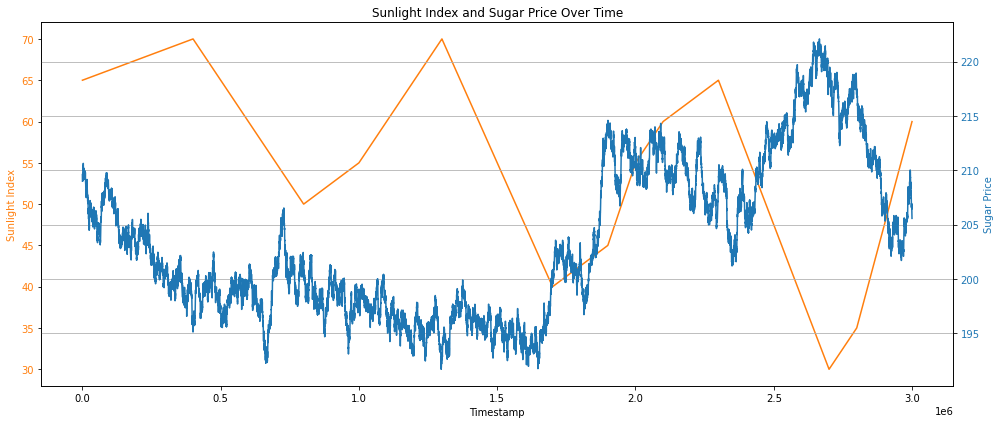

In [9]:
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Sunlight Index', color='tab:orange')
ax1.plot(df_all['timestamp'], df_all['sunlightIndex'], color='tab:orange', label='Sunlight Index')
ax1.tick_params(axis='y', labelcolor='tab:orange')

ax2 = ax1.twinx()  # Create second y-axis sharing the same x-axis
ax2.set_ylabel('Sugar Price', color='tab:blue')
ax2.plot(df_all['timestamp'], df_all['sugarPrice'], color='tab:blue', label='Sugar Price')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title("Sunlight Index and Sugar Price Over Time")
fig.tight_layout()
plt.grid(True)
plt.show()

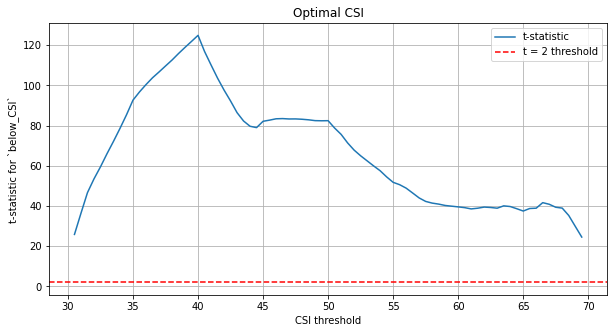

In [10]:
import statsmodels.api as sm

# We'll scan for CSI values between 20 and 70
candidates = np.arange(20, 70, 0.5)
results = []

for csi in candidates:
    df_all['below_csi'] = df_all['sunlightIndex'] < csi
    X = sm.add_constant(df_all['below_csi'].astype(int))
    y = df_all['sugarPrice']
    model = sm.OLS(y, X).fit()
    results.append({
        'CSI': csi,
        'coef': model.params['below_csi'],
        't_stat': model.tvalues['below_csi'],
        'r_squared': model.rsquared
    })

# Convert to DataFrame
csi_df = pd.DataFrame(results)

# Plot t-stat or R² over CSI values
plt.figure(figsize=(10, 5))
plt.plot(csi_df['CSI'], csi_df['t_stat'], label="t-statistic")
plt.axhline(2, color='red', linestyle='--', label='t = 2 threshold')
plt.xlabel("CSI threshold")
plt.ylabel("t-statistic for `below_CSI`")
plt.title("Optimal CSI")
plt.grid(True)
plt.legend()
plt.show()

What we see is:  
On the x-axis: candidate CSI thresholds (20 to 70).  
On the y-axis: the t-statistic of a simple regression where we test:  
- Does sunlightIndex < CSI help predict higher sugar prices? The red dashed line at t = 2 is a rough threshold for statistical significance (higher = more significant)  

The peak of the curve (around CSI ≈ 40) shows the highest t-statistic, meaning that this threshold most strongly separates low sunlight periods where sugar prices tend to rise.  

## Process Log file function

In [2]:
import json
import io
import re


# Function to process log file
def _process_data_(file_path):
    with open(file_path, 'r') as f:
        log_content = f.read()

    # Extract the three sections
    sections = log_content.split('Sandbox logs:')[1].split('Activities log:')
    sandbox_log = sections[0].strip()
    rest = sections[1].split('Trade History:')
    activities_log = rest[0].strip()
    trade_history_raw = rest[1].strip()

    # CLEAN TRADE HISTORY: Remove trailing commas from inside JSON objects
    # Match each JSON object separately
    trade_entries = re.findall(r'{[^{}]*}', trade_history_raw)
    cleaned_entries = []

    for entry in trade_entries:
        # Remove trailing commas before closing brace
        fixed = re.sub(r',\s*}', '}', entry)
        cleaned_entries.append(fixed)

    # Rebuild valid JSON array
    trade_history_json = f"[{','.join(cleaned_entries)}]"

    # Parse into DataFrame
    market_data_df = pd.read_csv(io.StringIO(activities_log), sep=";", header=0)
    trade_history_df = pd.json_normalize(json.loads(trade_history_json))

    return market_data_df, trade_history_df

market_data, trade_history = _process_data_("/Users/esma/Downloads/3e99f4e9-716c-493f-bad8-5e30ee7cb8d8_final.log")

In [3]:
market_data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,4,0,SQUID_INK,1929.0,1.0,1928.0,28.0,NaN,NaN,1931.0,2.0,1932.0,26.0,NaN,NaN,1930.0,0.0
1,4,0,CROISSANTS,4296.0,136.0,NaN,NaN,NaN,NaN,4297.0,41.0,4298.0,95.0,NaN,NaN,4296.5,0.0
2,4,0,JAMS,6446.0,95.0,6445.0,177.0,NaN,NaN,6447.0,95.0,6448.0,177.0,NaN,NaN,6446.5,0.0
3,4,0,VOLCANIC_ROCK_VOUCHER_10000,34.0,17.0,NaN,NaN,NaN,NaN,35.0,17.0,NaN,NaN,NaN,NaN,34.5,0.0
4,4,0,KELP,2037.0,1.0,2036.0,28.0,NaN,NaN,2040.0,28.0,NaN,NaN,NaN,NaN,2038.5,0.0


In [4]:
sells = trade_history[trade_history["seller"] == "SUBMISSION"]
sells

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,795,8
2,100,,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,789,10
4,200,,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,787,5
7,300,,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,785,6
9,400,,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,780,7
...,...,...,...,...,...,...,...
30268,999600,,SUBMISSION,RAINFOREST_RESIN,SEASHELLS,10001,1
30275,999800,,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,741,5
30277,999900,,SUBMISSION,VOLCANIC_ROCK_VOUCHER_9750,SEASHELLS,356,1
30279,999900,,SUBMISSION,VOLCANIC_ROCK_VOUCHER_9750,SEASHELLS,356,10


In [5]:
buys = trade_history[trade_history["buyer"] == "SUBMISSION"]
buys

,timestamp,buyer,seller,symbol,currency,price,quantity
29,1200,SUBMISSION,,KELP,SEASHELLS,2036,1
38,1300,SUBMISSION,,RAINFOREST_RESIN,SEASHELLS,9999,1
46,1500,SUBMISSION,,RAINFOREST_RESIN,SEASHELLS,9998,4
52,1700,SUBMISSION,,RAINFOREST_RESIN,SEASHELLS,9993,2
55,1700,SUBMISSION,,RAINFOREST_RESIN,SEASHELLS,9997,6
...,...,...,...,...,...,...,...
30260,999500,SUBMISSION,,VOLCANIC_ROCK_VOUCHER_10000,SEASHELLS,121,1
30262,999500,SUBMISSION,,VOLCANIC_ROCK_VOUCHER_10000,SEASHELLS,121,14
30271,999700,SUBMISSION,,MAGNIFICENT_MACARONS,SEASHELLS,749,9
30273,999700,SUBMISSION,,MAGNIFICENT_MACARONS,SEASHELLS,749,66


In [7]:
macaron_sells = sells[sells["symbol"] == "MAGNIFICENT_MACARONS"]
macaron_buys = buys[buys["symbol"] == "MAGNIFICENT_MACARONS"]
macaron_sells.head()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,795,8
2,100,,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,789,10
4,200,,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,787,5
7,300,,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,785,6
9,400,,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,780,7


In [9]:
macaron_buys.head()

,timestamp,buyer,seller,symbol,currency,price,quantity
30271,999700,SUBMISSION,,MAGNIFICENT_MACARONS,SEASHELLS,749,9
30273,999700,SUBMISSION,,MAGNIFICENT_MACARONS,SEASHELLS,749,66
30278,999900,SUBMISSION,,MAGNIFICENT_MACARONS,SEASHELLS,746,8


In [ ]:
sell_revenue = (macaron_sells["price"] * macaron_sells["quantity"]).sum()
buy_cost = (macaron_buys["price"] * macaron_buys["quantity"]).sum()

macaron_pnl = sell_revenue - buy_cost

print(f"MM PnL: {macaron_pnl:.2f}")
print(f"Sold {macaron_sells['quantity'].sum()} MMs for {sell_revenue:.2f}")
print(f"Bought {macaron_buys['quantity'].sum()} MMs for {buy_cost:.2f}")

MM PnL: 1473217.00
Sold 1830 MMs for 1535360.00
Bought 83 MMs for 62143.00
